In [32]:
import pandas as pd
df = pd.read_csv('D:\Feynn Lab Task 2\CAR DETAILS FROM CAR DEKHO.csv')

In [33]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [34]:
df.shape

(4340, 8)

In [35]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


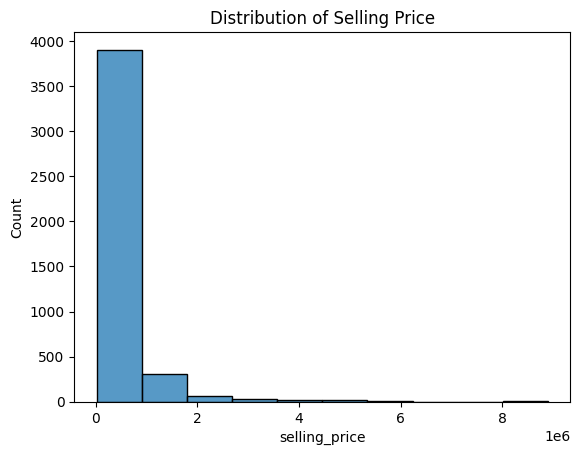

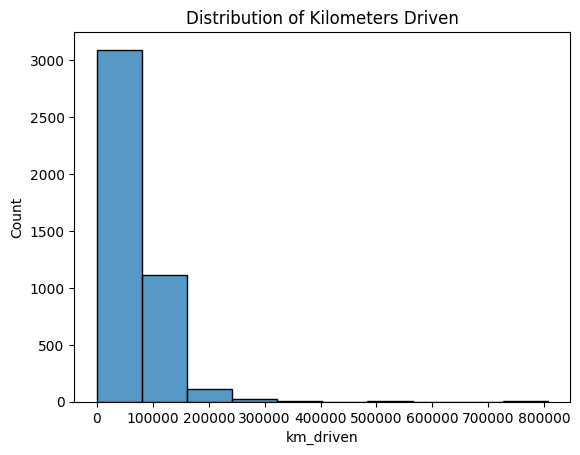

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Data preprocessing
# Encode categorical variables
data = pd.get_dummies(df, columns=["fuel", "seller_type", "transmission", "owner"])

# Exploratory Data Analysis (EDA)
# Visualize the distribution of numeric variables
sns.histplot(data=data, x="selling_price", bins=10)
plt.title("Distribution of Selling Price")
plt.show()

sns.histplot(data=data, x="km_driven", bins=10)
plt.title("Distribution of Kilometers Driven")
plt.show()

# Market Segmentation
# Segment by year (new vs. used)
data["new_or_used"] = data["year"].apply(lambda x: "New" if x >= 2017 else "Used")

# Analysis
# Calculate average selling price and km driven by segment
segmented_data = data.groupby("new_or_used").agg({
    "selling_price": "mean",
    "km_driven": "mean"
}).reset_index()



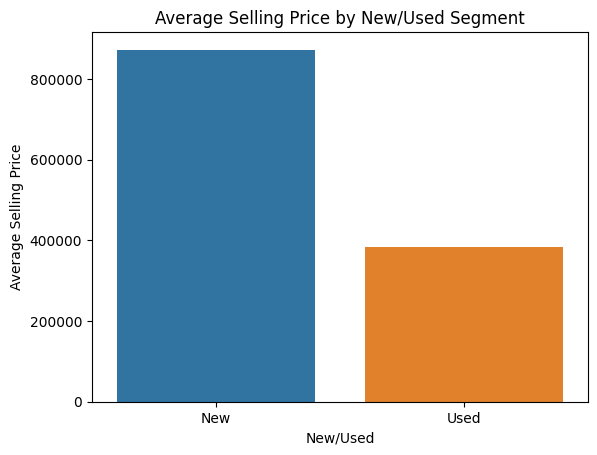

In [38]:
# Bar chart to compare average selling prices by segment
sns.barplot(data=segmented_data, x="new_or_used", y="selling_price")
plt.title("Average Selling Price by New/Used Segment")
plt.xlabel("New/Used")
plt.ylabel("Average Selling Price")
plt.show()

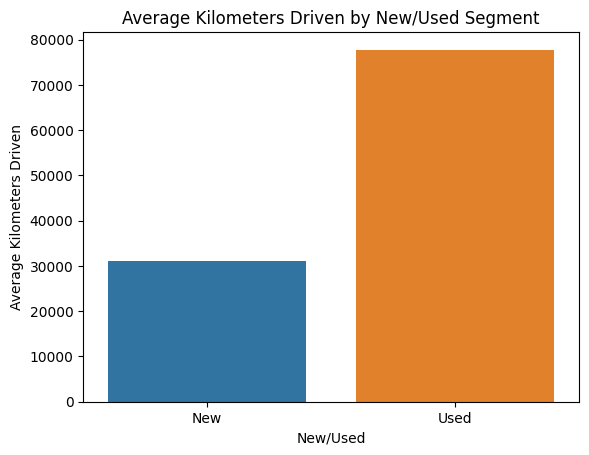

In [39]:
# Bar chart to compare average kilometers driven by segment
sns.barplot(data=segmented_data, x="new_or_used", y="km_driven")
plt.title("Average Kilometers Driven by New/Used Segment")
plt.xlabel("New/Used")
plt.ylabel("Average Kilometers Driven")
plt.show()

In [40]:
summary_stats = data[["year", "selling_price", "km_driven"]].describe()
summary_stats

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [41]:
correlation_matrix = data[["year", "selling_price", "km_driven"]].corr()
correlation_matrix

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


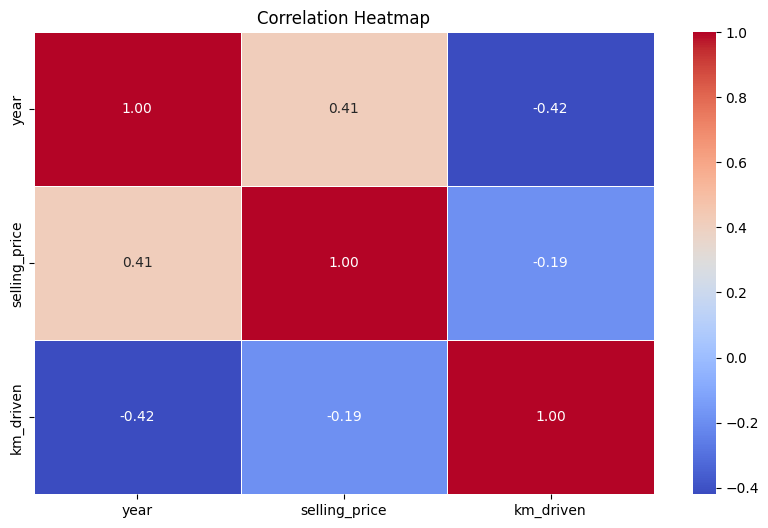

In [42]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

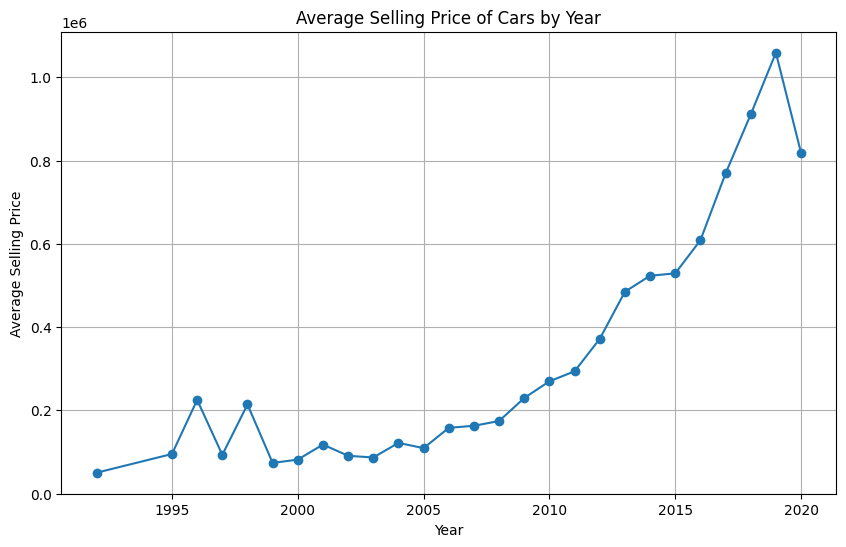

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=["name", "year", "selling_price", "Km_Driven", "fuel", "seller_type", "transmission", "owner"])

# Group the data by year and calculate the average selling price
yearly_avg_price = df.groupby("year")["selling_price"].mean().reset_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price["year"], yearly_avg_price["selling_price"], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price of Cars by Year")
plt.grid(True)

# Show the graph
plt.show()


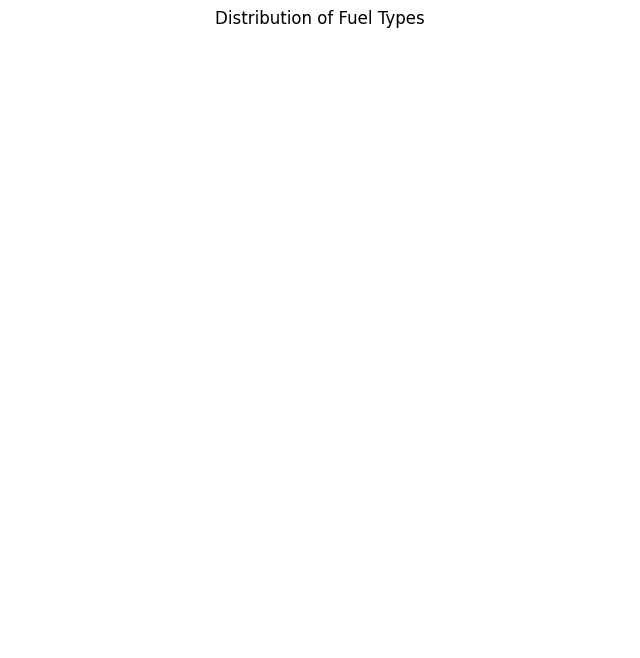

In [44]:
fuel_counts = df['fuel'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Fuel Types")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [45]:


fuel_counts = df['fuel'].value_counts()
print(fuel_counts)



Series([], Name: count, dtype: int64)


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Data preprocessing
# Encode categorical variables
data = pd.get_dummies(df, columns=["fuel", "seller_type", "transmission", "owner"])

# Standardize numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[["year", "selling_price", "km_driven"]])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Find the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Based on the Elbow Method, you can choose the optimal number of clusters.
# Let's say we choose 3 clusters for this example.
optimal_num_clusters = 3

# Fit K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
data["cluster"] = kmeans.fit_predict(data_pca)

# Visualize the clusters
sns.scatterplot(data=data, x="year", y="selling_price", hue="cluster", palette="Set1")
plt.title("Clustering Results")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()


KeyError: "['km_driven'] not in index"